In [3]:
import pandas as pd

# ==== INPUT / OUTPUT FILES ====
INPUT_FILE = "TESS candidates.csv"         # original dataset
OUTPUT_FILE = "tess_toi_clean.csv"  # cleaned dataset for ML

# ==== FEATURES SELECTION ====

# ✅ Required Features (core for ML)
required = [
    "pl_orbper", "pl_trandurh", "pl_trandep",
    "pl_rade", "pl_insol", "pl_eqt",
    "st_tmag", "st_teff", "st_logg", "st_rad"
]

# ⚪ Optional Features (may help, not mandatory)
optional = [
    # Planet & star errors/uncertainties
    "pl_orbpererr1", "pl_orbpererr2",
    "pl_trandurherr1", "pl_trandurherr2",
    "pl_trandeperr1", "pl_trandeperr2",
    "pl_radeerr1", "pl_radeerr2",
    "pl_insolerr1", "pl_insolerr2",
    "pl_eqterr1", "pl_eqterr2",
    "st_tmagerr1", "st_tmagerr2",
    "st_disterr1", "st_disterr2",
    "st_tefferr1", "st_tefferr2",
    "st_loggerr1", "st_loggerr2",
    "st_raderr1", "st_raderr2",
    # Stellar distance & motion
    "st_dist", "st_pmra", "st_pmdec"
]

# 🎯 Target Column
target = ["tfopwg_disp"]

# ==== CLEAN DATASET ====

# Load
df = pd.read_csv(INPUT_FILE)

# Subset
keep_columns = required + optional + target
df_clean = df[keep_columns]

# Save new dataset
df_clean.to_csv(OUTPUT_FILE, index=False)

print(f"[INFO] Cleaned dataset saved as: {OUTPUT_FILE}")
print(f"[INFO] Shape: {df_clean.shape}")
print(f"[INFO] Columns kept: {list(df_clean.columns)}")


[INFO] Cleaned dataset saved as: tess_toi_clean.csv
[INFO] Shape: (7703, 36)
[INFO] Columns kept: ['pl_orbper', 'pl_trandurh', 'pl_trandep', 'pl_rade', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_teff', 'st_logg', 'st_rad', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandeperr1', 'pl_trandeperr2', 'pl_radeerr1', 'pl_radeerr2', 'pl_insolerr1', 'pl_insolerr2', 'pl_eqterr1', 'pl_eqterr2', 'st_tmagerr1', 'st_tmagerr2', 'st_disterr1', 'st_disterr2', 'st_tefferr1', 'st_tefferr2', 'st_loggerr1', 'st_loggerr2', 'st_raderr1', 'st_raderr2', 'st_dist', 'st_pmra', 'st_pmdec', 'tfopwg_disp']


In [5]:
import pandas as pd
import numpy as np

# ==== INPUT FILE ====
INPUT_FILE = "tess_toi_clean.csv"

# ==== LOAD DATA ====
df = pd.read_csv(INPUT_FILE)

print("\n===== BASIC INFO =====")
print(f"Shape of dataset: {df.shape}")
print("\nColumn Data Types:")
print(df.dtypes)
# print("\nMemory Usage (bytes):")
# print(df.memory_usage(deep=True))

print("\n===== NULL / MISSING VALUES =====")
null_counts = df.isnull().sum()
null_perc = (null_counts / len(df)) * 100
null_report = pd.DataFrame({
    "Missing Values": null_counts,
    "Missing %": null_perc.round(2)
})
print(null_report)

print("\n===== UNIQUE VALUES =====")
for col in df.columns:
    unique_vals = df[col].nunique(dropna=True)
    print(f"{col}: {unique_vals} unique values")
    if df[col].dtype == "object":
        print(df[col].value_counts().head(5))
        print("-----")

# print("\n===== DESCRIPTIVE STATS (NUMERIC) =====")
# print(df.describe(include=[np.number]).T)

print("\n===== DESCRIPTIVE STATS (CATEGORICAL) =====")
print(df.describe(include=["object"]).T)

print("\n===== TARGET DISTRIBUTION =====")
if "tfopwg_disp" in df.columns:
    print(df["tfopwg_disp"].value_counts())
    print("\nClass % distribution:")
    print((df["tfopwg_disp"].value_counts(normalize=True) * 100).round(2))

print("\n===== CONSTANT COLUMNS CHECK =====")
constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
print("Constant Columns:", constant_cols if constant_cols else "None")

print("\n===== DUPLICATE ROWS CHECK =====")
print("Duplicate rows:", df.duplicated().sum())

print("\n===== RANGE OF EACH NUMERIC FEATURE =====")
for col in df.select_dtypes(include=[np.number]).columns:
    print(f"{col}: Min={df[col].min()}, Max={df[col].max()}")



===== BASIC INFO =====
Shape of dataset: (7703, 36)

Column Data Types:
pl_orbper          float64
pl_trandurh        float64
pl_trandep         float64
pl_rade            float64
pl_insol           float64
pl_eqt             float64
st_tmag            float64
st_teff            float64
st_logg            float64
st_rad             float64
pl_orbpererr1      float64
pl_orbpererr2      float64
pl_trandurherr1    float64
pl_trandurherr2    float64
pl_trandeperr1     float64
pl_trandeperr2     float64
pl_radeerr1        float64
pl_radeerr2        float64
pl_insolerr1       float64
pl_insolerr2       float64
pl_eqterr1         float64
pl_eqterr2         float64
st_tmagerr1        float64
st_tmagerr2        float64
st_disterr1        float64
st_disterr2        float64
st_tefferr1        float64
st_tefferr2        float64
st_loggerr1        float64
st_loggerr2        float64
st_raderr1         float64
st_raderr2         float64
st_dist            float64
st_pmra            float64
st_pmdec 

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, LabelEncoder

# ===== LOAD DATA =====
INPUT_FILE = "tess_toi_clean.csv"
OUTPUT_FILE = "tess_toi_ml_ready.csv"

df = pd.read_csv(INPUT_FILE)

# ===== 1. DROP USELESS COLUMNS =====
drop_cols = ["pl_insolerr1", "pl_insolerr2", "pl_eqterr1", "pl_eqterr2"]
df = df.drop(columns=drop_cols, errors="ignore")

print(f"Dropped columns: {drop_cols}")

# ===== 2. HANDLE MISSING VALUES =====
# Use median imputation for numeric features
for col in df.select_dtypes(include=[np.number]).columns:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# For categorical target, drop rows with missing
df = df.dropna(subset=["tfopwg_disp"])

print("Missing values imputed.")

# ===== 3. TRANSFORM SKEWED FEATURES =====
# Features with extreme ranges to log-transform
log_features = ["pl_trandep", "pl_insol", "st_rad", "st_teff", "st_dist"]

for col in log_features:
    if col in df.columns:
        df[col] = np.log1p(df[col])  # log1p handles 0 safely

print(f"Applied log1p transform to: {log_features}")

# ===== 4. SCALE FEATURES =====
scaler = RobustScaler()  # handles outliers better than StandardScaler
num_cols = df.select_dtypes(include=[np.number]).columns

df[num_cols] = scaler.fit_transform(df[num_cols])

print("Scaled numeric features using RobustScaler.")

# ===== 5. ENCODE LABEL =====
le = LabelEncoder()
df["tfopwg_disp"] = le.fit_transform(df["tfopwg_disp"])

print("Encoded target labels:")
for i, cls in enumerate(le.classes_):
    print(f"{cls} -> {i}")

# ===== 6. SAVE ML-READY CSV =====
df.to_csv(OUTPUT_FILE, index=False)
print(f"\n✅ ML-ready dataset saved as: {OUTPUT_FILE}")


Dropped columns: ['pl_insolerr1', 'pl_insolerr2', 'pl_eqterr1', 'pl_eqterr2']
Missing values imputed.
Applied log1p transform to: ['pl_trandep', 'pl_insol', 'st_rad', 'st_teff', 'st_dist']
Scaled numeric features using RobustScaler.
Encoded target labels:
APC -> 0
CP -> 1
FA -> 2
FP -> 3
KP -> 4
PC -> 5


C:\Users\Tilak Devi\AppData\Local\Temp\ipykernel_10584\3851326437.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\Tilak Devi\AppData\Local\Temp\ipykernel_10584\3851326437.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For


✅ ML-ready dataset saved as: tess_toi_ml_ready.csv


Shape: (7703, 32)
Columns: ['pl_orbper', 'pl_trandurh', 'pl_trandep', 'pl_rade', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_teff', 'st_logg', 'st_rad', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandeperr1', 'pl_trandeperr2', 'pl_radeerr1', 'pl_radeerr2', 'st_tmagerr1', 'st_tmagerr2', 'st_disterr1', 'st_disterr2', 'st_tefferr1', 'st_tefferr2', 'st_loggerr1', 'st_loggerr2', 'st_raderr1', 'st_raderr2', 'st_dist', 'st_pmra', 'st_pmdec', 'tfopwg_disp']


C:\Users\Tilak Devi\AppData\Local\Temp\ipykernel_10584\1363790285.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="tfopwg_disp", data=df, palette="Set2")


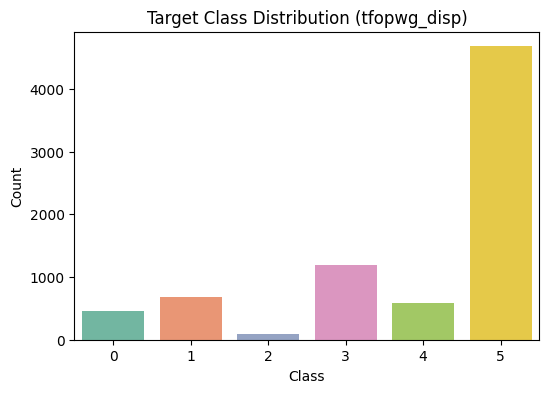

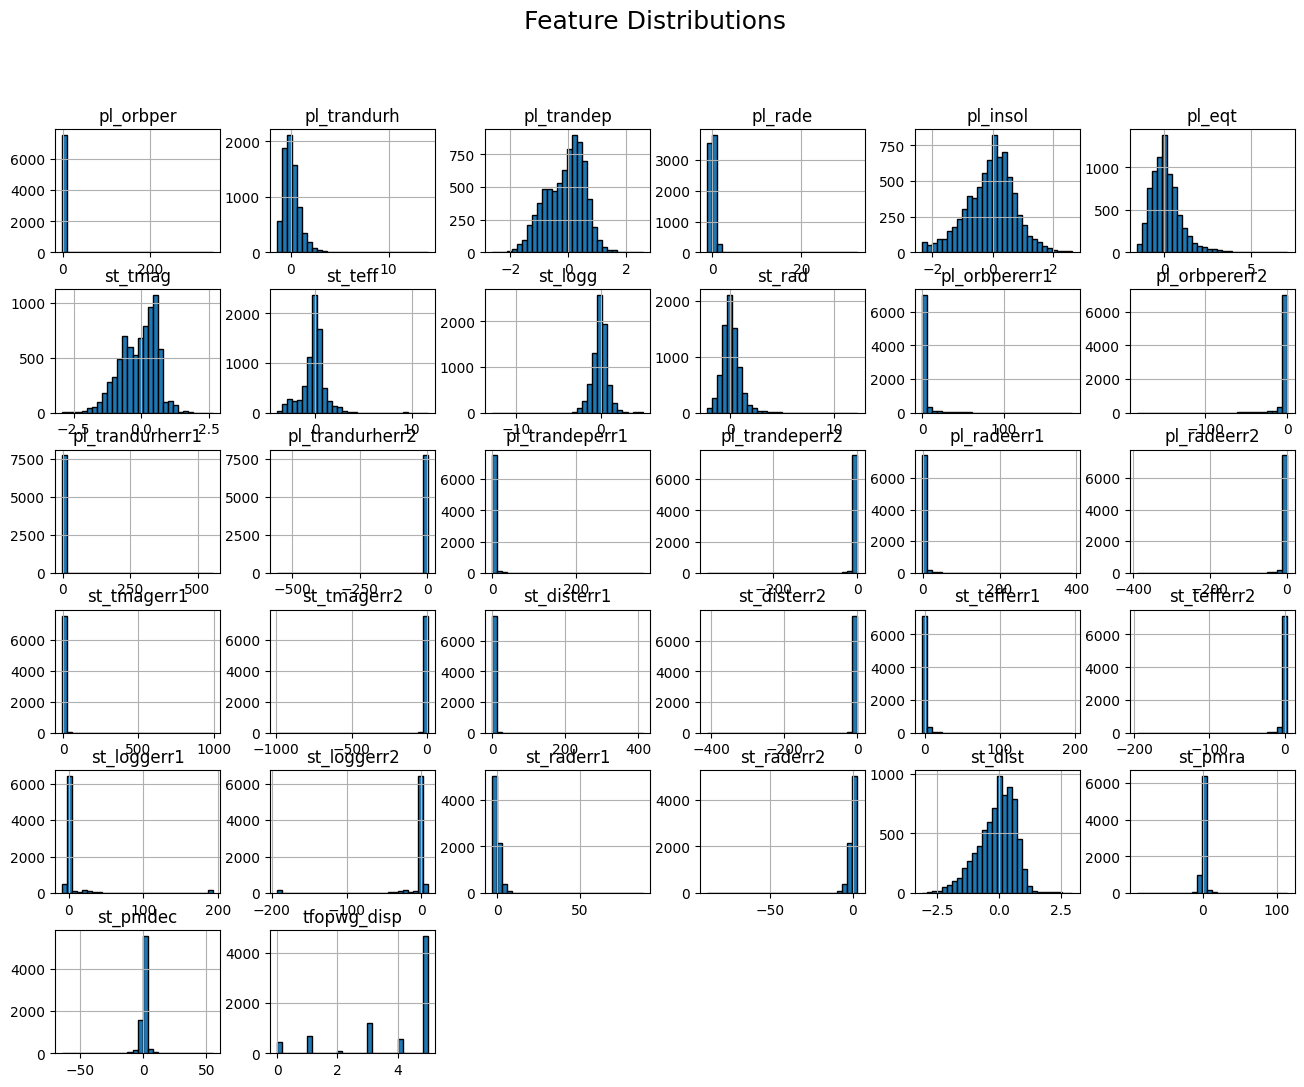

C:\Users\Tilak Devi\AppData\Local\Temp\ipykernel_10584\1363790285.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="tfopwg_disp", y=col, data=df, palette="Set3")
C:\Users\Tilak Devi\AppData\Local\Temp\ipykernel_10584\1363790285.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="tfopwg_disp", y=col, data=df, palette="Set3")
C:\Users\Tilak Devi\AppData\Local\Temp\ipykernel_10584\1363790285.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="tfopwg_disp", y=col, data=df, palette="Set3")
C:\Users\Tilak Devi\AppData\Local\Temp\ipyk

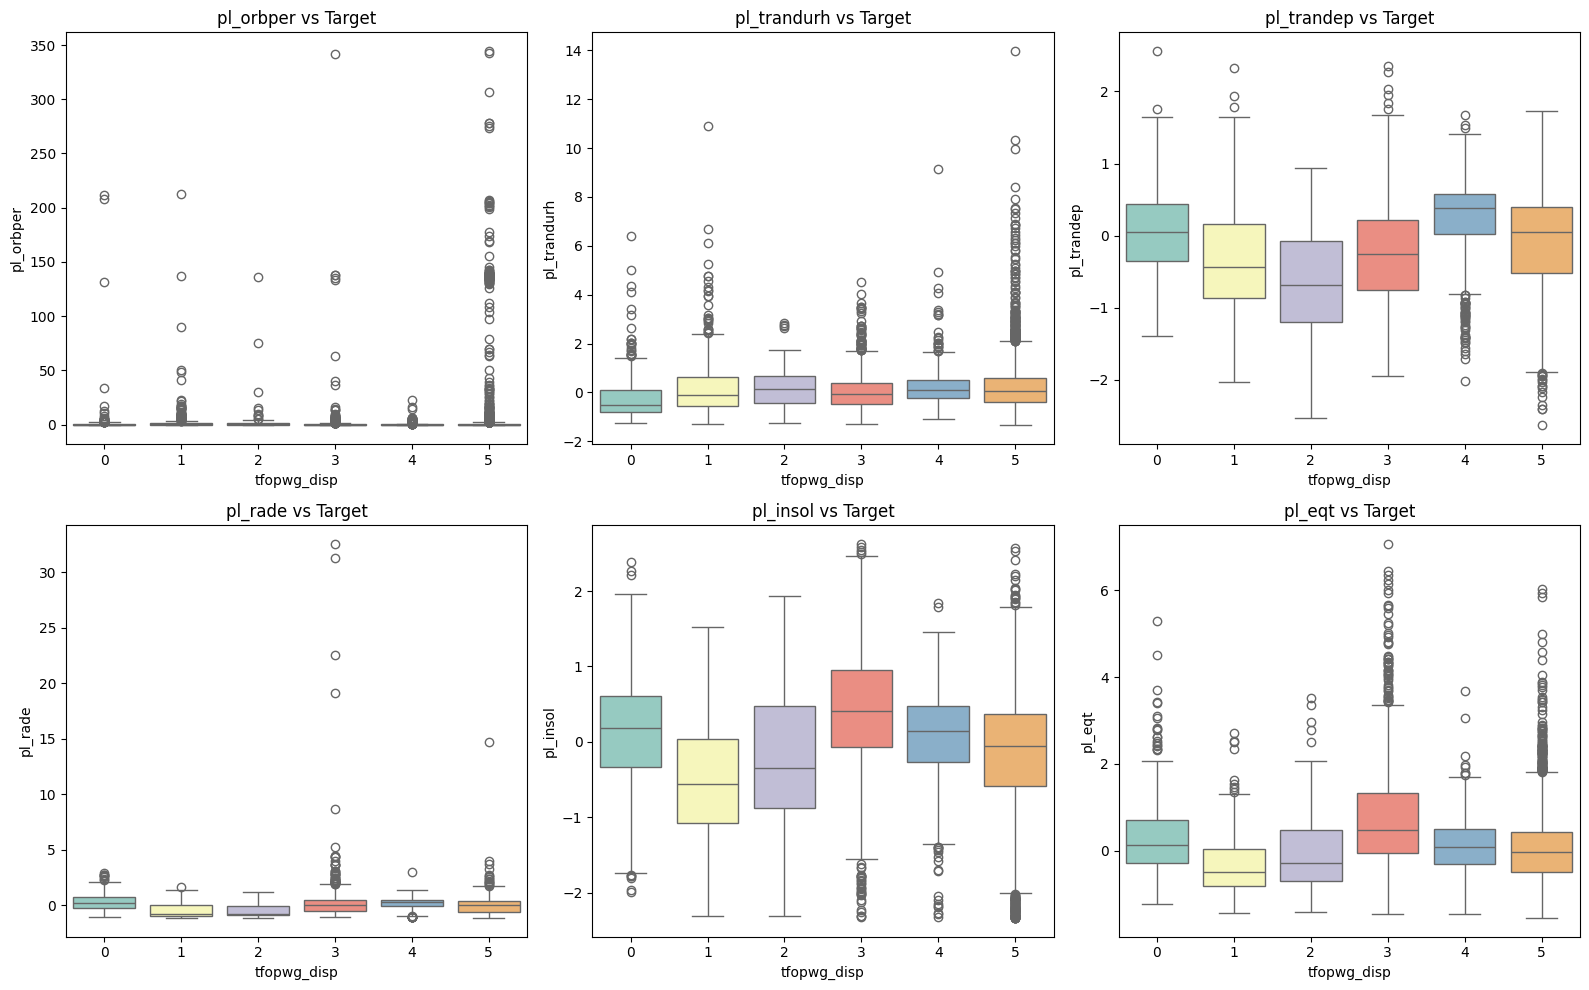

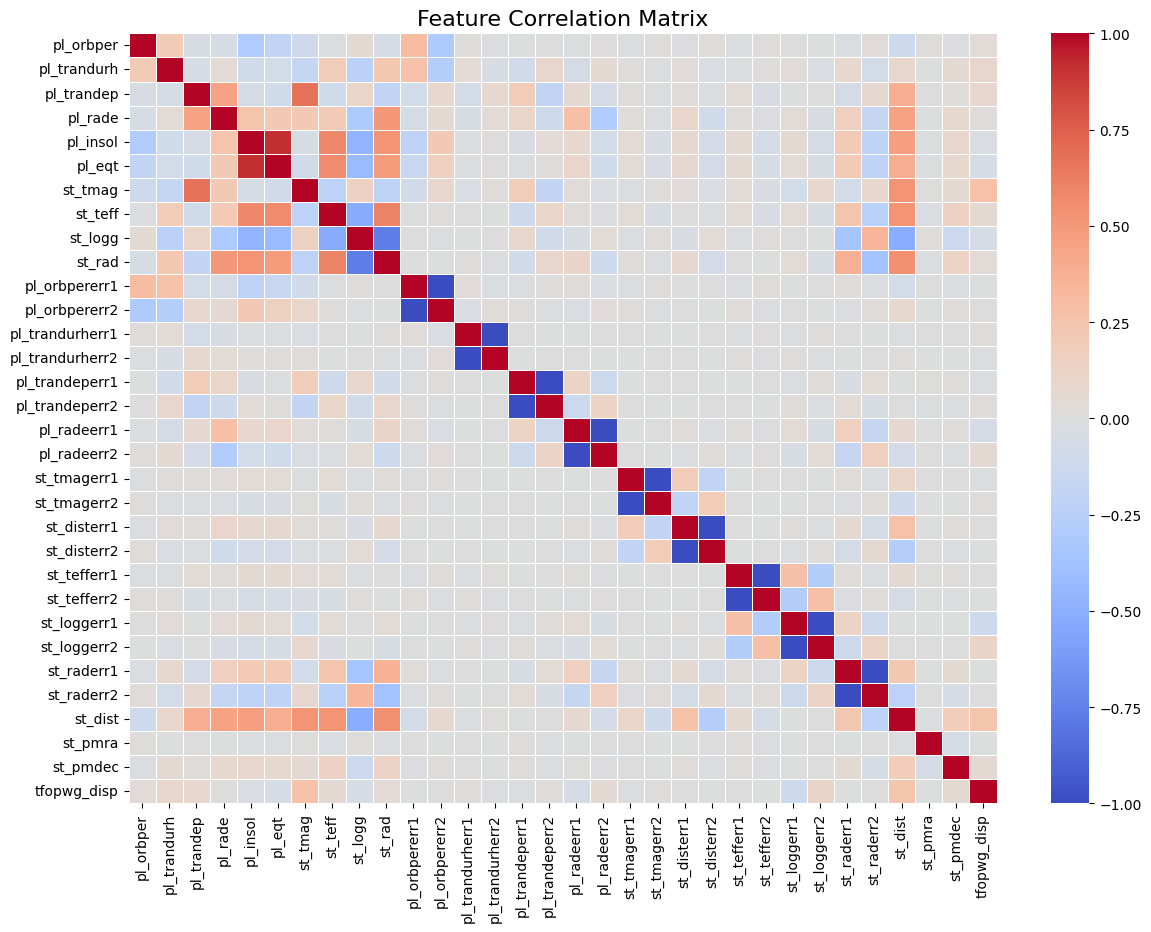

Correlation Matrix:
                 pl_orbper  pl_trandurh  pl_trandep   pl_rade  pl_insol  \
pl_orbper         1.000000     0.195777   -0.046446 -0.050673 -0.290655   
pl_trandurh       0.195777     1.000000   -0.052276  0.040936 -0.101285   
pl_trandep       -0.046446    -0.052276    1.000000  0.456125 -0.060965   
pl_rade          -0.050673     0.040936    0.456125  1.000000  0.251600   
pl_insol         -0.290655    -0.101285   -0.060965  0.251600  1.000000   
pl_eqt           -0.191192    -0.083936   -0.099485  0.215932  0.918623   
st_tmag          -0.104519    -0.165909    0.678165  0.212064 -0.049905   
st_teff          -0.015154     0.194756   -0.099550  0.209970  0.585837   
st_logg           0.048316    -0.230137    0.108078 -0.301646 -0.469644   
st_rad           -0.048552     0.225642   -0.175817  0.500066  0.525316   
pl_orbpererr1     0.297212     0.267547   -0.083030 -0.058973 -0.214849   
pl_orbpererr2    -0.297212    -0.267547    0.083030  0.058973  0.214849   
pl_tr

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("tess_toi_ml_ready.csv")

# Basic info
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# =====================
# 1. Target Distribution
# =====================
plt.figure(figsize=(6,4))
sns.countplot(x="tfopwg_disp", data=df, palette="Set2")
plt.title("Target Class Distribution (tfopwg_disp)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# =====================
# 2. Numeric Feature Distributions
# =====================
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

df[numeric_cols].hist(figsize=(16,12), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=18)
plt.show()

# =====================
# 3. Boxplots by Target
# =====================
plt.figure(figsize=(16,10))
for i, col in enumerate(numeric_cols[:6]):  # first 6 features for readability
    plt.subplot(2,3,i+1)
    sns.boxplot(x="tfopwg_disp", y=col, data=df, palette="Set3")
    plt.title(f"{col} vs Target")
plt.tight_layout()
plt.show()

# =====================
# 4. Correlation Heatmap
# =====================
plt.figure(figsize=(14,10))
corr = df[numeric_cols].corr()

sns.heatmap(
    corr,
    annot=False,       # set True if you want numbers inside
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5
)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.show()

# =====================
# 5. Print Correlation Matrix
# =====================
print("Correlation Matrix:")
print(corr)

# =====================
# 6. Correlations with Target (Descending Order)
# =====================
target_corr = corr["tfopwg_disp"].sort_values(ascending=False)
print("\nCorrelation with Target (tfopwg_disp):")
print(target_corr)
